# Make School Summer Academy 2017 Analysis

---
### David Evans

## Presentation Structure

1. Summary of data

2. Questions to consider

3. Conclusions

## 1. Summary of Data

### Entries on the experience of those who went through the Summer Academy
* ID
* Location
* Track
* Week
* Rating (1-10)
* Schedule Pacing

### Location
* Allows us to determine where we need to make changes
* Where to expand if possible or shut down if necessary

### Track
* Shows which paths are most popular
* Which curriculum to develop further or drop

### Week
* Illuminates changes over time
* When the program is good and when things need to change

### Rating
* Used to calculate NPS
* Who likes the way things are and who is unsatisfied

### Schedule Pacing
* How much faster or slower the program should run
* Why, potentially, the rating is as it is

## 2. Questions to Consider

### What's the Net Promoter Score (NPS)?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 - Divide ratings into categories:
    * Promoters (9-10)
    * Passives (7-8)
    * Detractors (1-6)

 - Calculate the percentage of responses in each category out of the total number of responses to the survey


 - Subtract the Detractors percentage from the Promoters percentage. This is the NPS

In other words:

NPS = (Promoters - Detractors) / (Promoters + Passives + Detractors)

In [2]:
df = pd.read_csv('SA Feedback Surveys_FINAL/2017/Student Feedback Surveys-Superview.csv')
df["Rating (Num)"] = df["Rating (Num)"].apply(lambda x: int(x) if (x != "#ERROR!") else 5)
sns.set_palette("bright")

In [3]:
df["NPS_Cat"] = df["Rating (Num)"].apply(lambda x: "Promoter" if (x >= 9) 
                                             else ("Detractor" if x <= 6 
                                              else "Passive"))

df["NPS_Cat"].value_counts()

Promoter     760
Passive      569
Detractor    124
Name: NPS_Cat, dtype: int64

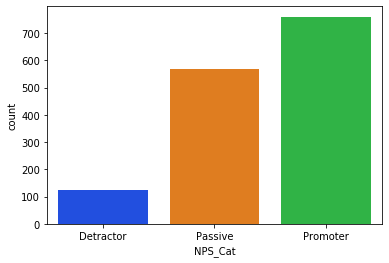

In [4]:
plt.show(sns.countplot(df["NPS_Cat"]))

In [5]:
nps = (760 - 124) / (760 + 569 + 124)

nps

0.4377150722642808

### Which tracks are most popular?

In [6]:
pd.crosstab(df["Track"], df["NPS_Cat"], normalize='index')

NPS_Cat,Detractor,Passive,Promoter
Track,,,
Apps,0.089552,0.407577,0.502870
"Apps, Explorer",0.107143,0.486607,0.406250
Games,0.043269,0.317308,0.639423
"Games, Explorer",0.000000,0.279070,0.720930
VR,0.033333,0.200000,0.766667


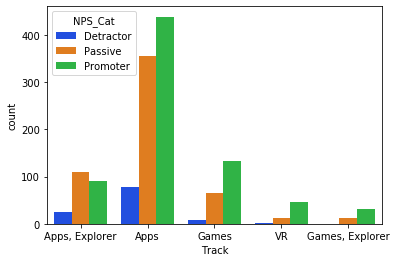

In [7]:
plt.show(sns.countplot("Track", hue="NPS_Cat", data=df))

### How good is the schedule pace?

In [8]:
df["Schedule Pacing"].value_counts()

Just right           1034
A little too fast     289
A little too slow     100
Way too fast           23
Way too slow            4
Name: Schedule Pacing, dtype: int64

In [9]:
pd.crosstab(df["Schedule Pacing"], df["Track"])

Track,Apps,"Apps, Explorer",Games,"Games, Explorer",VR
Schedule Pacing,,,,,
A little too fast,197,43,21,5,10
A little too slow,58,9,25,0,5
Just right,603,165,158,38,45
Way too fast,13,7,1,0,0
Way too slow,0,0,3,0,0


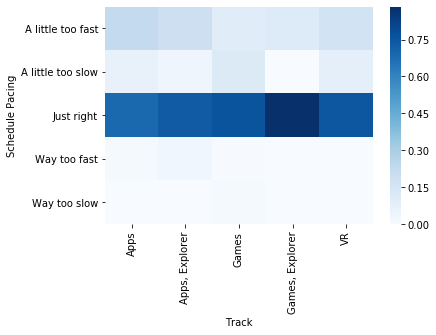

In [10]:
plt.show(sns.heatmap(pd.crosstab(df["Schedule Pacing"], df["Track"], normalize='columns'), cmap="Blues"))

In [11]:
pd.crosstab(df["Schedule Pacing"], df["Location"])

Location,Atlanta,Beijing,Chicago,Hong Kong,Los Angeles,New York City,Oakland,Redwood City,San Francisco,Santa Clara,Tokyo,Washington DC
Schedule Pacing,,,,,,,,,,,,
A little too fast,5,23,26,6,19,34,13,7,64,46,22,11
A little too slow,1,7,3,2,10,19,5,5,24,11,5,5
Just right,27,46,40,3,76,271,29,46,265,141,36,29
Way too fast,0,2,1,0,1,6,0,0,6,1,2,2
Way too slow,0,0,0,0,0,0,0,0,1,2,0,0


In [12]:
pd.crosstab(df["Schedule Pacing"], df["Location"])[["Atlanta", "Redwood City"]]

Location,Atlanta,Redwood City
Schedule Pacing,,
A little too fast,5,7
A little too slow,1,5
Just right,27,46
Way too fast,0,0
Way too slow,0,0


In [13]:
df[df["Location"] == "Atlanta"]["Track"].value_counts()

Apps, Explorer    18
Apps              15
Name: Track, dtype: int64

In [14]:
df[df["Location"] == "Redwood City"]["Track"].value_counts()

Apps    58
Name: Track, dtype: int64

### How did experience change over time?

In [15]:
pd.crosstab(df["Rating (Num)"], df["Week"])

Week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Rating (Num),,,,,,,,
0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0
2,0,0,0,0,1,1,0,0
3,1,2,1,2,0,1,1,0
4,6,2,0,3,2,0,0,0
5,9,7,7,6,4,1,4,0
6,12,12,13,8,7,5,2,0
7,40,34,22,25,22,18,15,1
8,91,82,64,49,45,41,19,1


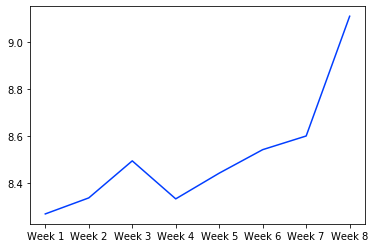

In [16]:
weeks = sorted(df["Week"].unique())
means = []
for week in weeks:
    means.append(df[df.Week == week]["Rating (Num)"].mean())
plt.show(sns.lineplot(weeks, means))

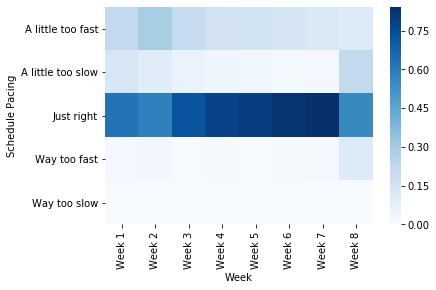

In [17]:
sns.heatmap(pd.crosstab(df["Schedule Pacing"], df["Week"], normalize='columns'), cmap="Blues")

### Which locations had the best and worst experience?

In [18]:
locations = pd.crosstab(df["Location"], df["NPS_Cat"], normalize='index')
locations

NPS_Cat,Detractor,Passive,Promoter
Location,,,
Atlanta,0.000000,0.272727,0.727273
Beijing,0.000000,0.320513,0.679487
Chicago,0.057143,0.414286,0.528571
Hong Kong,0.272727,0.636364,0.090909
Los Angeles,0.047170,0.311321,0.641509
New York City,0.106061,0.412121,0.481818
Oakland,0.042553,0.382979,0.574468
Redwood City,0.086207,0.396552,0.517241
San Francisco,0.086111,0.375000,0.538889


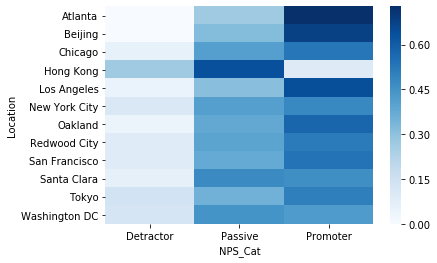

In [19]:
plt.show(sns.heatmap(locations, cmap="Blues"))

## 3. Conclusions

 - Expand the Atlanta, LA, and Beijing branches
 
 
 - Shut down the Hong Kong branch
 
 
 - Speed up the pace of the Apps track a little bit everywhere except Atlanta and Redwood City
 
 
 - Focus on improving the curriculum of Apps and Apps, Explorer
 
 
 - Keep an eye on Week 3-4 to ensure people don't lose interest